
# <h1><center> <font color='red'> Fonction de coût d'un lanceur </font> </h1>

<center> Léa MICHEL (ONERA/DTIS) </center>
<center> Sous la direction de Brieuc DANET (ONERA/DTIS) </center>
<center> Juin 2020 </center>


![image.png](./image/WO_fonction_cout.png)

__<center> Modèle WhatsOpt pour calcul de la fonction de coût d'un lanceur </center>__
<br>
Le calcul de la fonction de coût se sépare en plusieurs parties : 
 - les coûts de développement 
 - les coûts de production
 - les coûts d'opération qui sont séparés en deux :
   - les coûts directs de lancement, directement liés au nombre de lancements effectués
   - les coûts d’opération indirects, liés au fonctionnement du site de lancement
 - les coûts du porteur dû au lancement aéroporté
 
La dernière sous analyse somme toutes ces sous analyses afin d'obtenir le coût total.
 
Les sous analyses sont détaillées par la suite.

Les calculs sont inspirés de :
>- La thèse Contant, S. (2019). Design and Optimization of a Small Reusable Launch Vehicle Using Vertical
>- Drenthe, N. T. (2016). $OLSTICE Small Orbital Launch Systems, a Tentative Initial Cost
Estimate
>- Projet ALTAIR

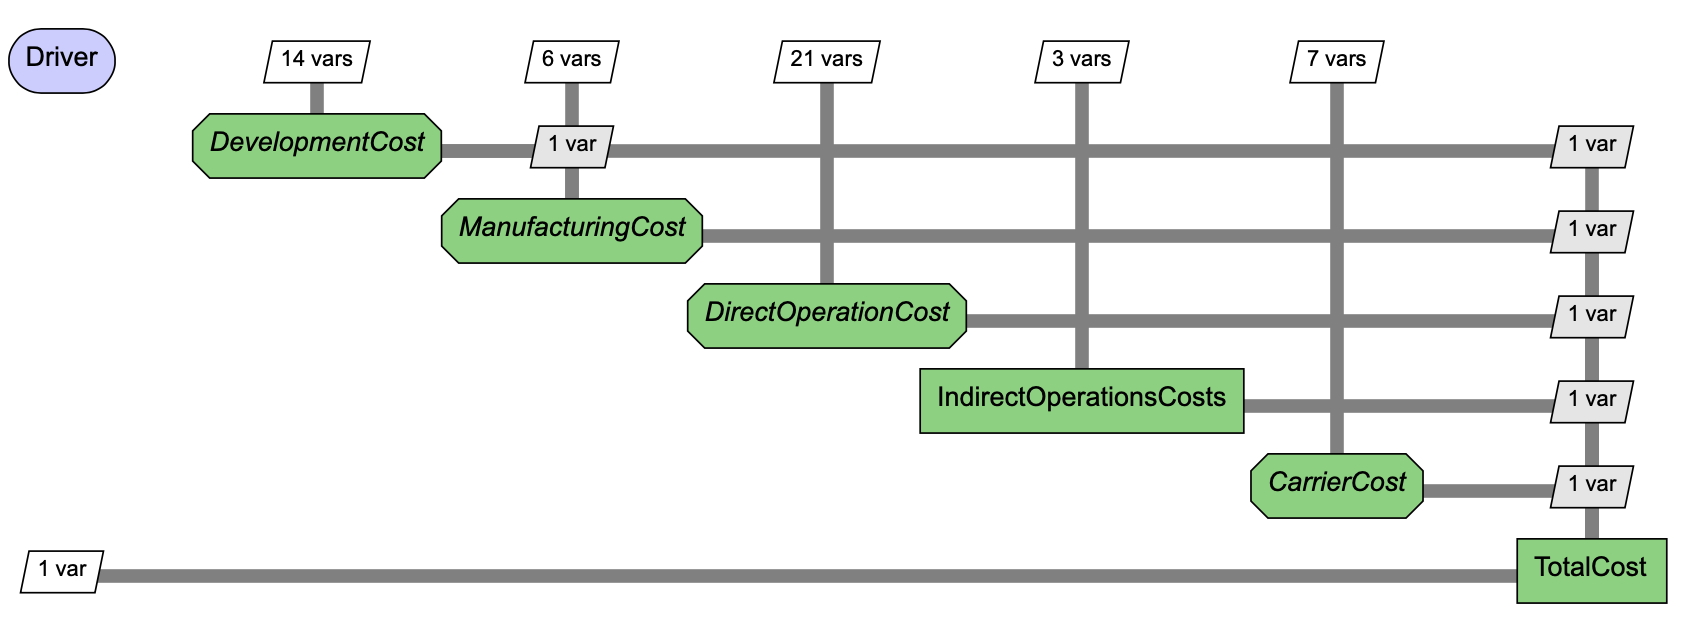

## <font color='red'> Coût de développement</font>
![image.png](./image/WO_DVP.png)



Les calculs des coûts de développement sont détaillés ci dessous :

<center>  
${TFU} = HW * a * Mass^b*V^2 $    
avec $HW$ le nombre de fois où l'appareil est présent $\\[10pt]$
    
<center>
$\\[10pt]{FM1} = TFU (1 - M/PA) $ si ${TFU}\ne 0 \\[10pt] $ 

<center>   
${FM1} = 0 $ si ${TFU} = 0 \\[10pt] $  
<center>  
${MAIT} = FM1 * (STH + Ld * HW) \\[10pt] $  
<center> 
${ENG} = DD * FM1 \\[10pt] $ 
<center>  
${MPA} = (MAIT + ENG) * M/PA \\[10pt] $ 
<center> 
${PO} = ENG + MPA \\[10pt] $  
<center>  
${f_0} = 1.05^{Ns} \\[10pt] $  


La sous analyse "Total" permet d'obtenir un vecteur (32,1) avec :
<center>
    ${Cdev} = (Cp * (PO + MAIT)) * f0 * f1 * f3 * f10 * f11 \\[10pt] $
<center> 


Pour obtenir le coût de dévelopement, il faut additionner toutes les composantes de ce vecteur colonne (sous analyse "Sum").

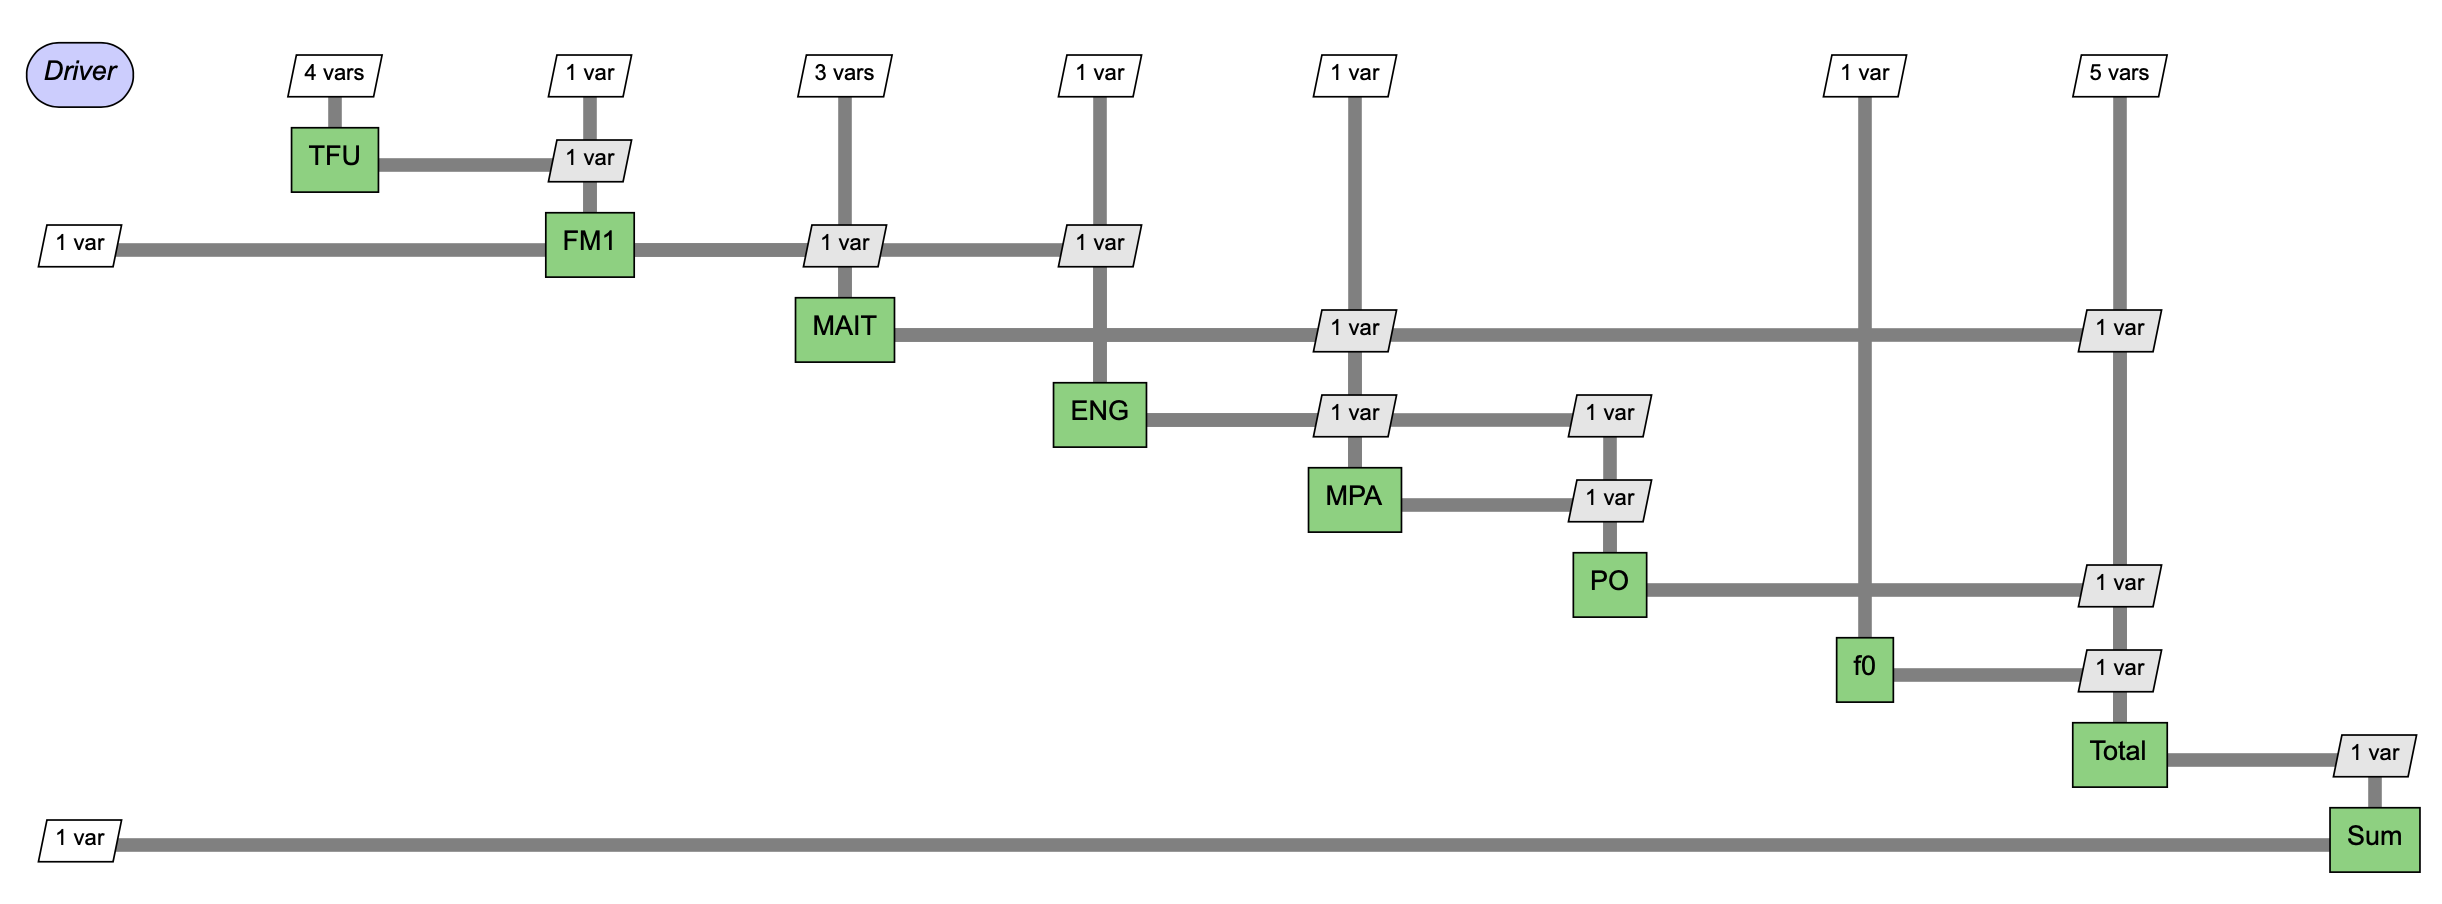

## <font color='red'> Coût de production </font>
![image.png](./image/WO_Prod.png)

Les calculs des coûts de production sont détaillés ci dessous :
<center>
${Lm} = n ^{ln(p)/ln(2)} \\[10pt] $ 
<center>

    
<center>
${C_{prod}} = Cp * (FM1 * Lm + M_{PA-Percentage}) * f10 * f11 \\[20pt] $ 

Nous obtenons alors un vecteur (32,1).

Pour obtenir le coût total de développement de production il faut additionner toutes les composantes du vecteur colonne ${C_{prod}}$.
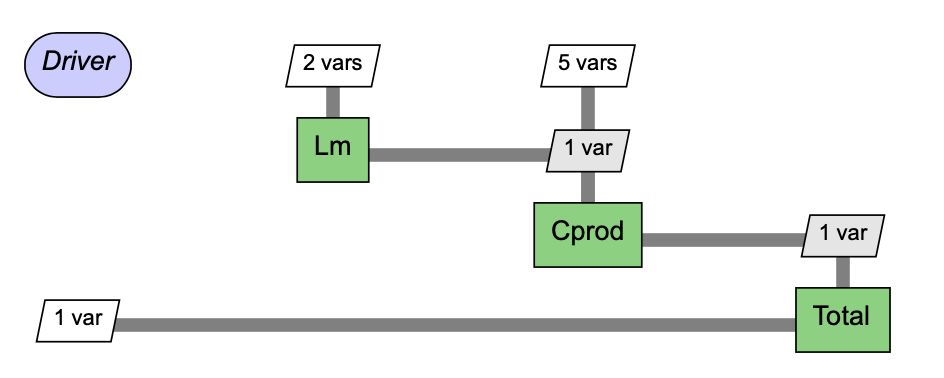

## <font color='red'> Coût d'opération </font>
Les coûts d'opération sont séparés en deux parties. Une première avec les coûts directs qui sont liés au nombre de lancements effectués. Puis les coûts indirects qui sont liés au fonctionnement du site de lancement.

### Coût d'opération direct

![image.png](./image/WO_OpDirect.png)

Le calcul de ces coûts sont détaillés dans *la thèse Contant, S. (2019). Design and Optimization of a Small Reusable Launch Vehicle Using Vertical.*

La sous analyse "Total" permet d'additionner tous ces coûts afin d'obtenir le total des coûts de développement.
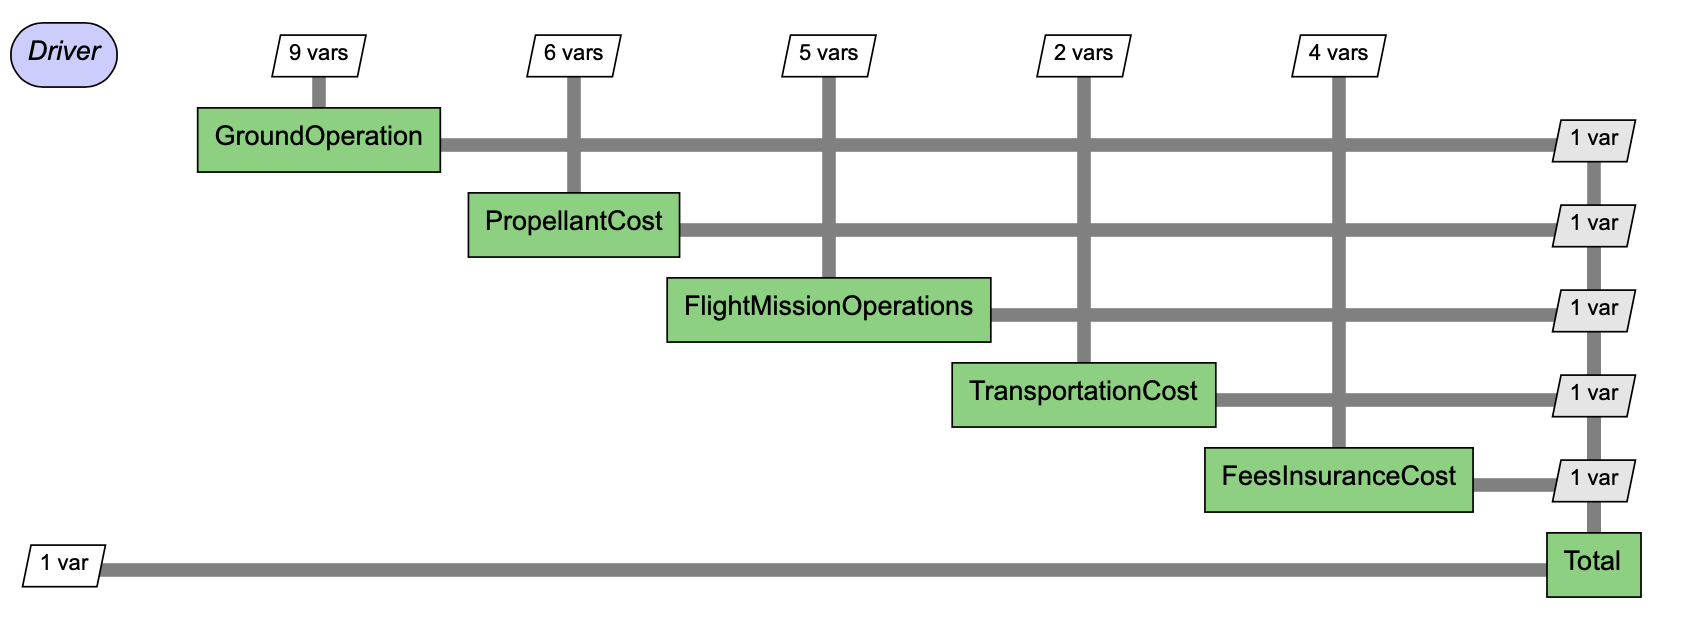


![image.png](./image/Tableau_these.png)

<center>
Coûts d'opération direct d'après la thèse de Contant,S.

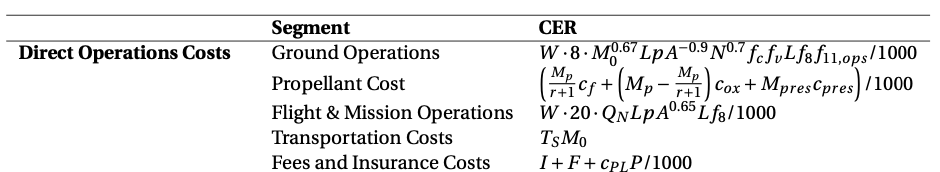

### Coût d'opération indirect

Pour le calcul des coûts d'opération indirect il n'est pas nécessaire de faire une sous analyse car il n'y a qu'un seul calcul à faire :

<center>
${C_{IO}} = (40 * S + 24) * LpA^{-0.379} *\frac{W}{1000} $ 

## <font color='red'> Coût porteur </font>
![image.png](./image/WO_Porteur.png)

Pour calculer le coût du porteur, les données du projet PIE ont été utilisées, car ces calculs n'apparaissent pas dans la thèse citée précédemment. Le projet PIE a basé ces calculs sur les documents issus du projet ALTAIR.

Le coût du porteur se décompose donc en trois parties :

<center>
${C_{runway}} = \frac{OneKmRunway * ExtRunway}{YearsRunway} * \frac{1}{Launches} \\[20pt] $ 

<center>
${C_{RunwayMaintenance}} = \frac{CostRunwayMaintenancePerYear}{Launches} \\[20pt]$ 

<center>
${C_{RunwayMaintenance}} = CostAircraft * HoursAircraft \\[20pt]$ 
    

Le coût du porteur est ensuite établi en sommant ces trois parties.

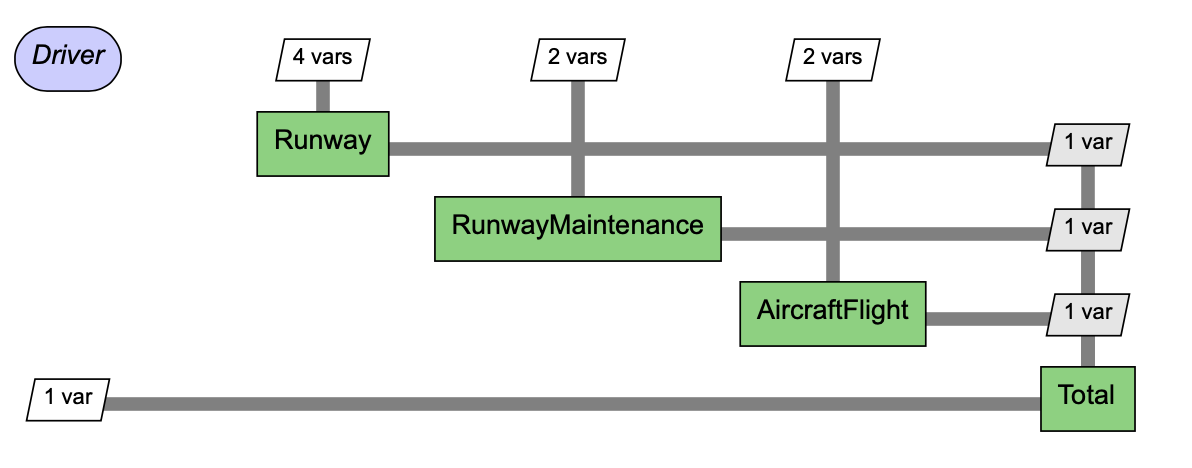

## <font color='red'> Paramètres </font>

Il est possible de modifier les paramètres ci dessous :

In [1]:
def initialize(mda): # Permet de modifier les paramètres et d'éxécuter le code ensuite
    mda['a'] = [80,44.04074,31.48271,19.99465,8.95877,90.72782,27.45211,6.70369,2.7993,2.7993,80,44.04074,31.48271,19.99465,8.95877,90.72782,27.45211,6.70369,2.7993,2.7993,80,44.04074,31.48271,19.99465,8.95877,90.72782,27.45211,6.70369,2.7993,2.7993,4.09558,124.86209]
    mda['b'] = [0.80,1.06207,0.78811,0.71253,0.68815,0.44422,0.44623,0.68041,0.91199,0.91199,0.80,1.06207,0.78811,0.71253,0.68815,0.44422,0.44623,0.68041,0.91199,0.91199,0.80,1.06207,0.78811,0.71253,0.68815,0.44422,0.44623,0.68041,0.91199,0.91199,0.96587,0.31031]
    mda['Cf'] = 15
    mda['CostAircraft'] = 4
    mda['CostRunwayMaint'] = 25
    mda['Cox'] = 0.45
    mda['Cp'] = 0.9695
    mda['Cpres'] = 50
    mda['C_PL'] = 5.51
    mda['DD'] = 3
    mda['ExtRunway'] = 1.0
    mda['F'] = 1220
    mda['f1'] = 1.0
    mda['f10'] = 0.85
    mda['f11'] = 0.50
    mda['f3'] = 1.0
    mda['f8'] = 0.86
    mda['fc'] = 0.60
    mda['fv'] = 0.50
    mda['HoursAircraft'] = 4
    mda['HW'] = [1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    mda['I'] = 100
    mda['L'] = 0.56
    mda['Ld'] = [1,1,0.8,1,1,1,1,1,1,1,1,1,0.9,1,1,1,1,1,1,1,1,1,0.5,1,1,1,1,1,1,1,1,1]
    mda['LpA'] = 30
    mda['M0'] = 26.60
    mda['Mass'] = [25,0,242.6,257,55,2450,0,326,0,0,15,0,312,53.8,10.9,490,0,120,0,0,30,90,45,0,33,0,0,0,0,0,15,20]
    mda['Mp'] = 24410
    mda['Mpres'] = 50
    mda['M_PA_percentage'] = 0.0525
    mda['n'] = 30
    mda['Ns'] = 3.5
    mda['OnekmRunway'] = 7000
    mda['p'] = 0.90
    mda['PayCap'] = 150
    mda['Q_N'] = 1.40
    mda['r'] = 0.12
    mda['S'] = 0.20
    mda['STH'] = 3.10
    mda['Ts'] = 5.37
    mda['W'] = 320000
    mda['YearsRunway'] = 20

## <font color='red'> Résultat </font>

In [2]:
"""
  run_analysis.py generated by WhatsOpt 1.9.0
"""
# DO NOT EDIT unless you know what you are doing
# analysis_id: 258

from openmdao.api import Problem
#from run_parameters_init import initialize # Importe la fonction Initialize et ses paramètres dans le fichier run_parameters_init
from cost_function import CostFunction 

pb = Problem(CostFunction())
pb.setup()  

initialize(pb)

pb.run_model()  
#pb.model.list_inputs(print_arrays=False) # Pour afficher les inputs


Unable to import mpi4py. Parallel processing unavailable.
|  
|  ===============
|  DevelopmentCost
|  ===============
|  NL: NLBGS Converged in 1 iterations
|  
|  =================
|  ManufacturingCost
|  =================
|  NL: NLBGS Converged in 1 iterations
|  
|  ===================
|  DirectOperationCost
|  ===================
|  NL: NLBGS Converged in 1 iterations
|  
|  ===========
|  CarrierCost
|  ===========
|  NL: NLBGS Converged in 1 iterations
|  
|  ===============
|  DevelopmentCost
|  ===============
|  NL: NLBGS Converged in 0 iterations
|  
|  =================
|  ManufacturingCost
|  =================
|  NL: NLBGS Converged in 0 iterations
|  
|  ===================
|  DirectOperationCost
|  ===================
|  NL: NLBGS Converged in 0 iterations
|  
|  ===========
|  CarrierCost
|  ===========
|  NL: NLBGS Converged in 0 iterations
NL: NLBGS Converged in 1 iterations


In [3]:
outputs=pb.model.list_outputs(print_arrays=False)

66 Explicit Output(s) in 'model'
--------------------------------

varname                      value               
---------------------------  --------------------
model
  indeps
    a                        |268.6577699311665| 
    b                        |4.325374125205818| 
    Cf                       [15.]               
    CostAircraft             [4.]                
    CostRunwayMaint          [25.]               
    Cox                      [0.45]              
    Cp                       [0.9695]            
    Cpres                    [50.]               
    C_PL                     [5.51]              
    DD                       [3.]                
    ExtRunway                [1.]                
    F                        [1220.]             
    f1                       [1.]                
    f10                      [0.85]              
    f11                      [0.5]               
    f3                       [1.]                
    f8            

## <font color='red'> Diagramme N2 </font>

In [1]:
from openmdao.visualization.n2_viewer.n2_viewer import n2
n2(pb, outfile='n2.html', show_browser=True, title='Fonction de cout')

Unable to import mpi4py. Parallel processing unavailable.


NameError: name 'pb' is not defined

In [5]:
from IPython.display import IFrame
display(IFrame(src='n2.html',width=1300,height=700))